# Task - 2 - Simple Linear Regression

# 1.Importing relevant libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
link='http://bit.ly/w-data'
data=pd.read_csv(link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As we can see from the above dataframe, we have two columns contaning the number of hours and scores. Hence, we will be trying to predict the scores of the student based on just one single feature which is number of study hours. Such a type of linear regression is called Simple Linear Regression that 
only considers the use of one feature to predict the result.

# 2.Pandas describe function will give us a quick look at the various indicators of our feature.

Now, we will try to understand how are our study hours and scores distributed exactly. 
This will help us understand what the mean and median values are. Let's do this !

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 3.Check for null values in dataset

In [5]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

As you can see there are no null values in the dataset 

# 4.Scatter plot to check the relationship between feature and target!

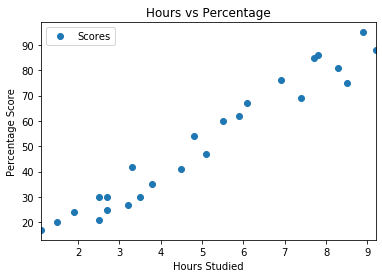

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# 5.Regressor plot to check the relationship between feature and target

Text(0, 0.5, 'Scores')

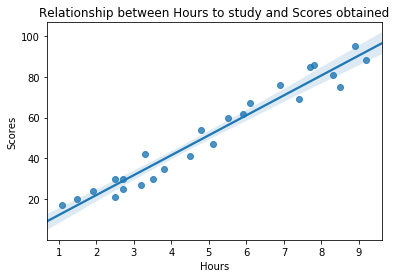

In [7]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

Both the graphs above show that there is a positive linear relation between feature and label.

# 6.Performing regression analysis for prediction

Preparing the data

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Using scikit-learn library to split the dataset into training and testing data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

Training the model using algorithm and converting 1D array to 2D array using reshape function

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [13]:
# You can also test with your own data
print("No of Hours = ",9.25)
print("Predicted Score = ",regressor.predict([[9.25]])[0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


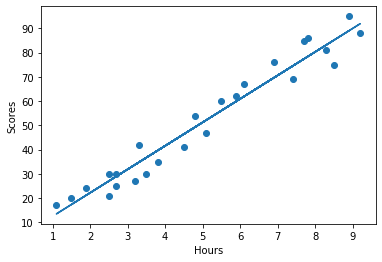

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [15]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3.9207511902099244
MSE:  18.943211722315272
RMSE:  4.352380006653288


In [16]:
print('Predicted score using Linear Regression with 9.25 hours of study: {0:.2f}'.format(regressor.predict([[9.25]])[0]))

Predicted score using Linear Regression with 9.25 hours of study: 92.39


# Step 4: Conclusion
Once we have applied a simple linear regression, we could draw the following conclusions:


1.The root mean squared error of the predictions is 4.35.
2.The mean absolute error is 3.92.
3.The predicted score of a student who studies for 9.25 hours is 92.39 according to the simple linear regression algorithm